In [24]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("mesh_features.csv")
df.head()

,mesh_name,class,area,volume,rectangularity,compactness,convexity,eccentricity,diameter,A3_bin_0,...,D4_bin_center_20,D4_bin_center_21,D4_bin_center_22,D4_bin_center_23,D4_bin_center_24,D4_bin_center_25,D4_bin_center_26,D4_bin_center_27,D4_bin_center_28,D4_bin_center_29
0,m1337.obj,AircraftBuoyant,2.567595,0.338307,0.401367,1.307688,0.859908,1.143945,1.033568,0.000000,...,0.666667,0.7,0.733333,0.766667,0.8,0.833333,0.866667,0.9,0.933333,0.966667
1,m1338.obj,AircraftBuoyant,3.314142,0.359405,0.391703,2.491678,0.836037,1.798762,1.047357,0.002276,...,0.666667,0.7,0.733333,0.766667,0.8,0.833333,0.866667,0.9,0.933333,0.966667
2,m1339.obj,AircraftBuoyant,3.172938,0.263182,0.677445,4.077757,1.562505,4.874752,1.000015,0.009857,...,0.666667,0.7,0.733333,0.766667,0.8,0.833333,0.866667,0.9,0.933333,0.966667
3,m1340.obj,AircraftBuoyant,0.561321,0.027836,0.217335,2.018231,0.610430,12.169459,0.999651,0.017274,...,0.666667,0.7,0.733333,0.766667,0.8,0.833333,0.866667,0.9,0.933333,0.966667
4,m1341.obj,AircraftBuoyant,0.671115,0.035075,0.251780,2.172427,0.686432,8.510702,0.998808,0.017117,...,0.666667,0.7,0.733333,0.766667,0.8,0.833333,0.866667,0.9,0.933333,0.966667


In [56]:
def chunk_classes(classlist,size=10):
    k = 0 #chunk index
    j = 0 #chunk internal index
    curchunk = []
    chunks = []
    for i in range(0,len(classlist)):
        j = i%size
        if(j==0 and i!=0):
            k+=1
            chunks.append(curchunk)
            curchunk=[]
        curchunk.append(classlist[i])

    return chunks

chunks = chunk_classes(df["class"].unique())



In [37]:
non_hist_features = [
    "area",
    "volume",
    "rectangularity",
    "compactness",
    "convexity",
    "eccentricity",
    "diameter",
]

In [38]:
scaler = StandardScaler()
Y = df[["mesh_name","class"]]
drops=["mesh_name","class"]
X = df.drop(drops,axis=1)
X = X.reset_index(drop=True)
X[non_hist_features] = (
            X[non_hist_features] - X[non_hist_features].mean()
        ) / X[non_hist_features].std()
#X = scaler.fit_transform(X)
#print(X)

In [39]:
print(X.columns)

Index(['area', 'volume', 'rectangularity', 'compactness', 'convexity',
       'eccentricity', 'diameter', 'A3_bin_0', 'A3_bin_1', 'A3_bin_2',
       ...
       'D4_bin_center_20', 'D4_bin_center_21', 'D4_bin_center_22',
       'D4_bin_center_23', 'D4_bin_center_24', 'D4_bin_center_25',
       'D4_bin_center_26', 'D4_bin_center_27', 'D4_bin_center_28',
       'D4_bin_center_29'],
      dtype='object', length=307)


In [41]:
def plot_data(df,xCol,yCol,subset=None, title="PCA of High-Dimensional Data",axis1='Principal Component 1',axis2='Principal Component 2',export_html=True,html_filename="plot.html"):
    # Step 3: Scatter Plot
    if(subset!=None):
        dfsubs = df[df["Class"].isin(subset)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dfsubs, x=df[xCol], y=df[yCol], hue='Class', palette=sns.color_palette(), s=70, alpha=0.8)
    plt.title(title)
    plt.xlabel(axis1)
    plt.ylabel(axis2)
    plt.legend(title='Class')
    plt.grid()
    plt.show()



def plot_data2(df, xCol, yCol, subset=None, title="PCA of High-Dimensional Data", axis1='Principal Component 1', axis2='Principal Component 2',export_html=True,html_filename="plot.html"):
    # Filter the subset if specified
    if subset is not None:
        df = df[df["Class"].isin(subset)]
    
    # Create the scatter plot
    fig = px.scatter(
        df,
        x=xCol,
        y=yCol,
        color="Class",
        title=title,
        labels={xCol: axis1, yCol: axis2},
        hover_data=df.columns  # This will show all columns in the hover text
    )
    
    # Update layout for better visualization
    fig.update_layout(
        xaxis_title=axis1,
        yaxis_title=axis2,
        legend_title_text="Class"
    )
    if export_html:
        fig.write_html("./plots/"+html_filename)
        print(f"Plot saved as {html_filename}")
    fig.show()

    

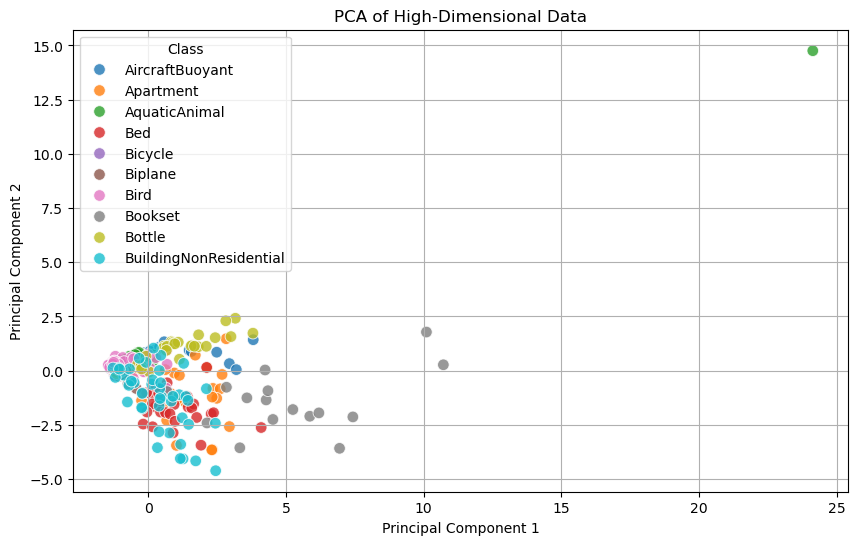

In [61]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
x_trans=pca.fit_transform(X)
# Step 2: Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=x_trans, columns=['PCA1', 'PCA2'])
pca_df['Class'] = Y['class']  # Add the class labels
pca_df['Name']=Y["mesh_name"]
plot_data(pca_df,"PCA1","PCA2",chunks[0])


In [43]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10).fit_transform(X)
tsne_df = pd.DataFrame(data=X_embedded, columns=['PCA1', 'PCA2'])
tsne_df['Class'] = Y['class']  # Add the class labels
tsne_df['Name']=Y["mesh_name"]

plot_data2(tsne_df,"PCA1","PCA2", title="TSNE with perplexity of 10", subset=chunks[0],html_filename="plot_tsne_perplexity_10.html")

Plot saved as plot_tsne_perplexity_10.html


In [60]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=60).fit_transform(X)
tsne_df = pd.DataFrame(data=X_embedded, columns=['PCA1', 'PCA2'])
tsne_df['Class'] = Y['class']  # Add the class labels
tsne_df['Name']=Y["mesh_name"]

plot_data2(tsne_df,"PCA1","PCA2",subset=chunks[0],title="TSNE-P perplexity - 60",html_filename="plot_tsne_perplexity_60.html")

Plot saved as plot_tsne_perplexity_60.html


In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=40,early_exaggeration=20).fit_transform(X)
tsne_df = pd.DataFrame(data=X_embedded, columns=['PCA1', 'PCA2'])
tsne_df['Class'] = Y['class']  # Add the class labels
tsne_df['Name']=Y["mesh_name"]

plot_data2(tsne_df,"PCA1","PCA2",subset=None,title="TSNE-P perplexity - 40",html_filename="plot_tsne_perplexity_40_complete.html")

Plot saved as plot_tsne_perplexity_40_complete.html


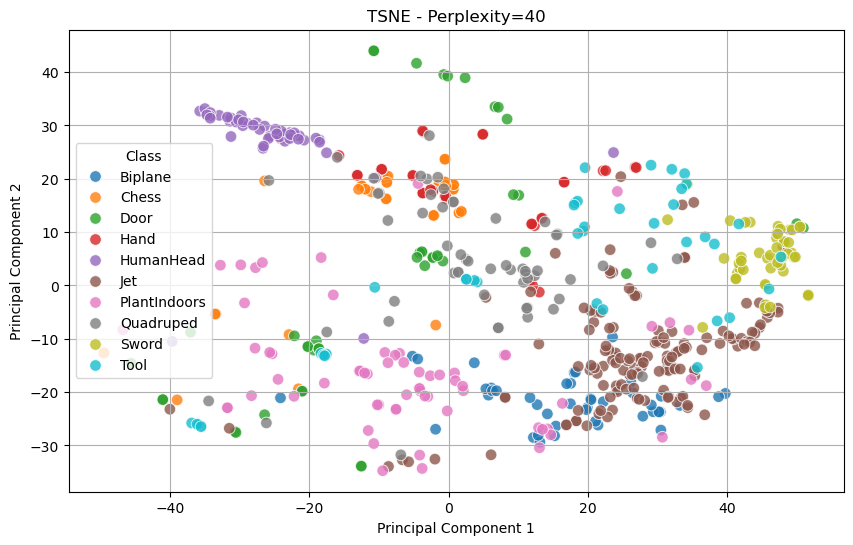

In [53]:
perplexity = 40
subs = ["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]
plot_data(tsne_df,"PCA1","PCA2",subset=subs, title=f"TSNE - Perplexity={perplexity}",html_filename="plot_tsne_selected_perplexity_40.html")

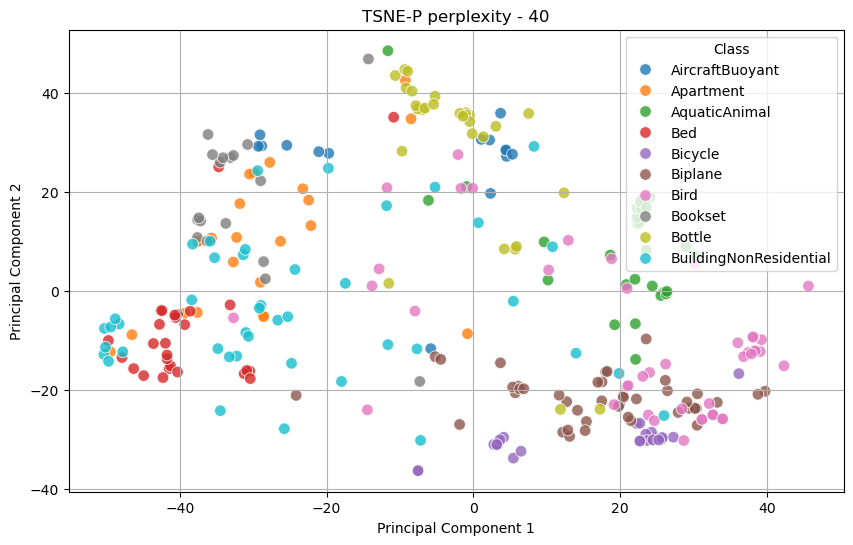

In [58]:
plot_data(tsne_df,"PCA1","PCA2",subset=chunks[0],title="TSNE-P perplexity - 40",html_filename="plot_tsne_perplexity_40.html")